In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('环球影城评论200.csv')
df2 = pd.read_csv('迪士尼评论200.csv')
df4 = pd.read_csv('马蜂窝-迪士尼评论.csv')

In [4]:
df1['内容'] = df1['内容'].astype("str")
df2['内容'] = df2['内容'].astype("str")
df4['内容'] = df4['内容'].astype("str")

In [5]:
#定义机械压缩函数
def yasuo(st):
    for i in range(1,int(len(st)/2)+1):
        for j in range(len(st)):
            if st[j:j+i] == st[j+i:j+2*i]:
                k = j + i
                while st[k:k+i] == st[k+i:k+2*i] and k<len(st):   
                    k = k + i
                st = st[:j] + st[k:]    
    return st

In [6]:
df1["内容"] = df1["内容"].apply(yasuo)
df2["内容"] = df2["内容"].apply(yasuo)
df4["内容"] = df4["内容"].apply(yasuo)

In [7]:
df1['内容'] = df1['内容'].str.extract(r"([\u4e00-\u9fa5]+)")
df1 = df1.dropna()  #纯表情弹幕直接删除
df2['内容'] = df2['内容'].str.extract(r"([\u4e00-\u9fa5]+)")
df2 = df2.dropna()  #纯表情弹幕直接删除
df4['内容'] = df4['内容'].str.extract(r"([\u4e00-\u9fa5]+)")
df4 = df4.dropna()  #纯表情弹幕直接删除

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\FELIX_~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.828 seconds.
Prefix dict has been built successfully.


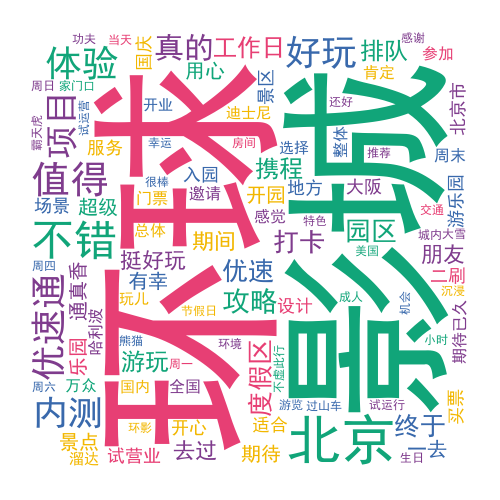

In [9]:
#数据处理库
import numpy as np
import pandas as pd
import glob
import re
import jieba 

#可视化库
import stylecloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from pyecharts.charts import *
from pyecharts import options as opts 
from pyecharts.globals import ThemeType  
from IPython.display import Image 

# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("stopwords_cn.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

#     # 添加关键词
#     my_words = []  
    
#     for i in my_words:
#         jieba.add_word(i) 

#     # 自定义停用词
#     my_stop_words = ['好像', '真的','感觉']   
#     stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

# 绘制词云图
text1 = get_cut_words(content_series=df1['内容'])
stylecloud.gen_stylecloud(text=' '.join(text1), max_words=100,
                          collocations=False,
                          font_path='simhei.ttf',
                          icon_name='fas fa-square',
                          size=500,
                          #palette='matplotlib.Inferno_9',
                          output_name='携程-环球影城.png')
Image(filename='携程-环球影城.png') 

In [10]:
text1 = get_cut_words(content_series=df1['内容'])
ditc = {}
list_word = []
list_count = []
for t in text1:
    ditc[t] = ditc.get(t, 0) + 1
ls = list(ditc.items())
ls.sort(key=lambda x: x[1], reverse=True)
for i in range(len(ls)):
    word, count = ls[i]
    list_word.append(word)
    list_count.append(count)
    print("{0:<5}{1:>5}".format(word, count))

df = pd.DataFrame()

df['word'] = list_word
df['count'] = list_count
df.to_csv('携程-环球影城高频词.csv',encoding='gbk')   

环球      83
影城      66
北京      40
不错      22
值得      18
体验      16
优速通     15
好玩      15
内测      14
项目      13
真的      10
攻略       9
终于       8
打卡       8
度假区      8
园区       8
优速       8
游玩       7
排队       7
工作日      7
携程       7
朋友       6
挺好玩      6
去过       6
期间       6
一去       5
期待       5
乐园       5
景点       5
开园       5
有幸       5
用心       5
超级       5
通真香      5
景区       4
开心       4
北京市      4
国庆       4
适合       4
试营业      4
入园       4
服务       4
游乐园      4
场景       4
设计       4
买票       4
大阪       4
二刷       4
地方       4
周末       3
期待已久     3
邀请       3
参加       3
万众       3
肯定       3
全国       3
整体       3
哈利波      3
总体       3
感觉       3
门票       3
迪士尼      3
选择       3
国内       3
溜达       3
玩儿       3
开业       3
节假日      2
交通       2
推荐       2
家门口      2
环影       2
游览       2
幸运       2
试运行      2
小时       2
机会       2
城内       2
周一       2
美国       2
房间       2
周六       2
环境       2
生日       2
霸天虎      2
过山车      2
不虚此行     2
当天       2
特色       2
试运营      2
感谢       2

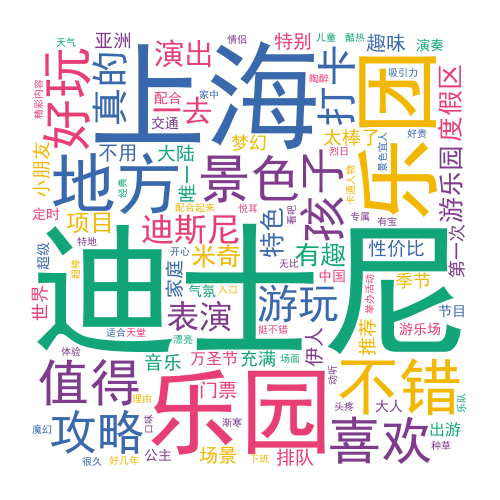

In [11]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("stopwords_cn.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

#     # 添加关键词
#     my_words = []  
    
#     for i in my_words:
#         jieba.add_word(i) 

#     # 自定义停用词
#     my_stop_words = ['好像', '真的','感觉']   
#     stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

# 绘制词云图
text1 = get_cut_words(content_series=df2['内容'])
stylecloud.gen_stylecloud(text=' '.join(text1), max_words=100,
                          collocations=False,
                          font_path='simhei.ttf',
                          icon_name='fas fa-square',
                          size=500,
                          #palette='matplotlib.Inferno_9',
                          output_name='携程-迪士尼.png')
Image(filename='携程-迪士尼.png') 

In [12]:
text1 = get_cut_words(content_series=df2['内容'])
ditc = {}
list_word = []
list_count = []
for t in text1:
    ditc[t] = ditc.get(t, 0) + 1
ls = list(ditc.items())
ls.sort(key=lambda x: x[1], reverse=True)
for i in range(len(ls)):
    word, count = ls[i]
    list_word.append(word)
    list_count.append(count)
    print("{0:<5}{1:>5}".format(word, count))

df = pd.DataFrame()

df['word'] = list_word
df['count'] = list_count
df.to_csv('携程-迪士尼高频词.csv',encoding='gbk')   

迪士尼     74
上海      45
乐园      28
乐团      24
地方      12
不错      11
景色       7
值得       7
好玩       7
喜欢       7
攻略       6
孩子       6
游玩       6
打卡       6
真的       5
迪斯尼      5
表演       5
一去       4
演出       4
有趣       3
游乐园      3
特色       3
度假区      3
米奇       3
项目       3
趣味       2
不用       2
伊人       2
性价比      2
太棒了      2
音乐       2
场景       2
门票       2
亚洲       2
特别       2
家庭       2
大陆       2
唯一       2
小朋友      2
排队       2
推荐       2
季节       2
充满       2
梦幻       2
世界       2
第一次      2
万圣节      2
出游       2
游乐场      2
中国       2
配合       2
节目       2
演奏       2
大人       2
公主       2
交通       2
定时       2
超级       2
气氛       2
天气       1
渐寒       1
种草       1
很久       1
口味       1
超棒       1
专属       1
体验       1
动听       1
悦耳       1
魔幻       1
好贵       1
卡通人物     1
儿童       1
好几年      1
挺不错      1
漂亮       1
适合       1
情侣       1
烈日       1
家中       1
有宝       1
看吧       1
特地       1
下班       1
经典       1
场面       1
配合起来     1
无比       1
陶醉       1
举办活动     1
开心       1

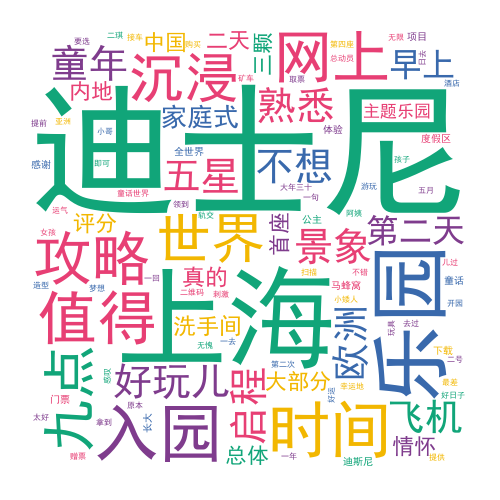

In [13]:
# 定义分词函数
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 
    
    with open("stopwords_cn.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

#     # 添加关键词
#     my_words = []  
    
#     for i in my_words:
#         jieba.add_word(i) 

#     # 自定义停用词
#     my_stop_words = ['好像', '真的','感觉']   
#     stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

# 绘制词云图
text1 = get_cut_words(content_series=df4['内容'])
stylecloud.gen_stylecloud(text=' '.join(text1), max_words=100,
                          collocations=False,
                          font_path='simhei.ttf',
                          icon_name='fas fa-square',
                          size=500,
                          #palette='matplotlib.Inferno_9',
                          output_name='马蜂窝-迪士尼.png')
Image(filename='马蜂窝-迪士尼.png') 

In [15]:
text1 = get_cut_words(content_series=df4['内容'])
ditc = {}
list_word = []
list_count = []
for t in text1:
    ditc[t] = ditc.get(t, 0) + 1
ls = list(ditc.items())
ls.sort(key=lambda x: x[1], reverse=True)
for i in range(len(ls)):
    word, count = ls[i]
    list_word.append(word)
    list_count.append(count)
    print("{0:<5}{1:>5}".format(word, count))

df = pd.DataFrame()

df['word'] = list_word
df['count'] = list_count
df.to_csv('马蜂窝-迪士尼高频词.csv',encoding='gbk')   

迪士尼     98
上海      52
乐园      24
入园      14
时间      13
值得      12
攻略      12
网上      12
沉浸      11
世界      11
九点      11
好玩儿     11
熟悉      11
童年      11
景象      11
不想      11
五星      11
欧洲      11
启程      11
飞机      11
第二天     11
早上      11
家庭式     11
洗手间     11
真的      11
大部分     11
情怀      11
二天      11
总体      11
评分      11
三颗      11
中国      11
内地      11
首座      11
主题乐园    11
体验       2
感谢       2
马蜂窝      2
全世界      2
长大       2
童话       2
公主       2
迪斯尼      2
门票       2
项目       2
下载       2
度假区      2
日去       1
五月       1
二号       1
幸运地      1
拿到       1
赠票       1
一回       1
感叹       1
运气       1
太好       1
一年       1
女孩       1
阿姨       1
第二次      1
一句       1
要选       1
好日子      1
孩子       1
梦想       1
原本       1
好运       1
玩具       1
总动员      1
酒店       1
一去       1
亚洲       1
二琪       1
童话世界     1
刺激       1
去过       1
最差       1
提供       1
无限       1
大年三十     1
造型       1
不错       1
轨交       1
小矮人      1
矿车       1
提前       1
无愧       1
领到       1
开园       1
扫描       1